### Step 4-0. Data

In [1]:
import os
import numpy as np
def get_Y(folder_path):
    y_age = []
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        age = int(file_name[2])
        y_age.append(age)
    # 轉numpy array
    y_true = np.array(y_age)
    return y_true

In [2]:
f_path = 'C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets/frames_row_data_Ruifang'
y_true = get_Y(folder_path=f_path)
print("y_true : ", y_true.shape)

y_true :  (54,)


In [3]:
import pandas as pd
f_path = "C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets_preprocessing/dtw_shift_row_data/"
red_X = np.array(pd.read_csv(f_path+"shift_red.csv", header=None))
print("red_X : ", red_X.shape, "\n", red_X[0][:10])
green_X = np.array(pd.read_csv(f_path+"shift_green.csv", header=None))
print("green_X : ", green_X.shape, "\n", green_X[0][:10])
brown_X = np.array(pd.read_csv(f_path+"shift_brown.csv", header=None))
print("brown_X : ", brown_X.shape, "\n", brown_X[0][:10])

red_X :  (54, 600) 
 [-15343 -15394 -15428 -15317 -15467 -15338 -15366 -15449 -15449 -15491]
green_X :  (54, 600) 
 [-648 -557 -515 -484 -471 -487 -678 -654 -691 -685]
brown_X :  (54, 600) 
 [7479 7377 7427 7128 7663 6828 7092 7352 6961 7057]


### Step 4-1. Kmeans

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

In [5]:
def show_silhouette(x):
    silhouette_avg = []
    for i in range(2,20):
        kmeans_fit = KMeans(n_clusters=i, max_iter=1000).fit(x)
        silhouette_avg.append(silhouette_score(x, kmeans_fit.labels_))
    plt.plot(range(2,20), silhouette_avg)

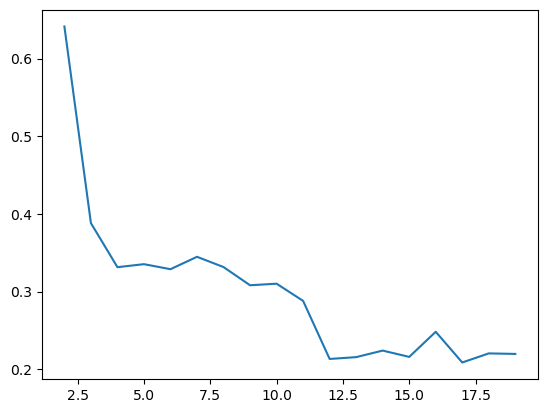

In [6]:
show_silhouette(x=red_X)

In [7]:
k_means = KMeans(n_clusters=3, max_iter=1000)
k_means.fit(red_X) # 訓練
y_red = k_means.predict(red_X) # 預測
adjusted_rand_score(y_true, y_red)

0.017799484466151132

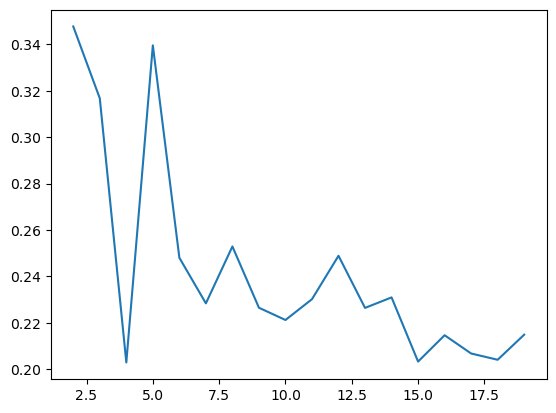

In [8]:
show_silhouette(x=green_X)

In [9]:
k_means = KMeans(n_clusters=3, max_iter=1000)
k_means.fit(green_X) # 訓練
y_green = k_means.predict(green_X) # 預測
adjusted_rand_score(y_true, y_green)

-0.014071214071214071

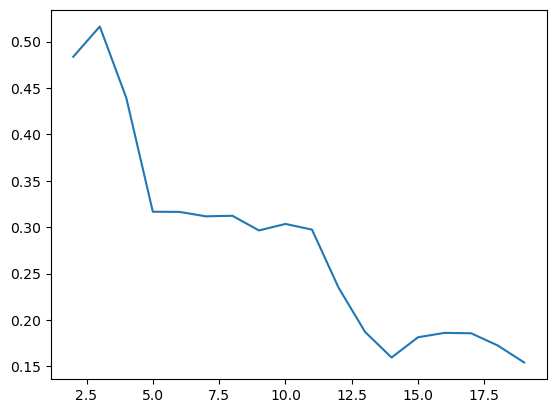

In [10]:
show_silhouette(x=brown_X)

In [11]:
k_means = KMeans(n_clusters=3, max_iter=1000)
k_means.fit(brown_X) # 訓練
y_brown = k_means.predict(brown_X) # 預測
adjusted_rand_score(y_true, y_brown)

-0.01618032173587729

### Step 4-2. DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
db = DBSCAN(eps=100000, min_samples=5).fit(red_X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 9


In [14]:
db = DBSCAN(eps=100000, min_samples=5).fit(green_X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 1


In [15]:
db = DBSCAN(eps=100000, min_samples=5).fit(brown_X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 9


### Step 4-3-0. ignored_index data

In [16]:
# clean_data
ignored_index = []
f_path = 'C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets/frames_row_data_Ruifang'
file_names = os.listdir(f_path)
for file_name in file_names:
    if int(file_name[4]) == 1:
        idx = file_names.index(file_name)
        ignored_index.append(idx)
print(ignored_index)

[3, 15, 27, 41, 46]


In [17]:
f_path = "C:/Users/zombie/PycharmProjects/NTUE_ThesisProject_ImageProcessing/datasets_preprocessing/dtw_shift_row_data/"
red_X = np.array(pd.read_csv(f_path+"shift_red.csv", header=None))
red_c = np.delete(red_X, ignored_index, axis=0)
print("red_c : ", red_c.shape)
green_X = np.array(pd.read_csv(f_path+"shift_green.csv", header=None))
green_c = np.delete(green_X, ignored_index, axis=0)
print("green_c : ", green_c.shape)
brown_X = np.array(pd.read_csv(f_path+"shift_brown.csv", header=None))
brown_c = np.delete(brown_X, ignored_index, axis=0)
print("brown_c : ", brown_c.shape)
# ---
y_true_c = np.delete(y_true, ignored_index, axis=0)
print("y_true_c : ", y_true_c.shape)

red_c :  (49, 600)
green_c :  (49, 600)
brown_c :  (49, 600)
y_true_c :  (49,)


### Step 4-3-1. ignored_index data & Kmeans

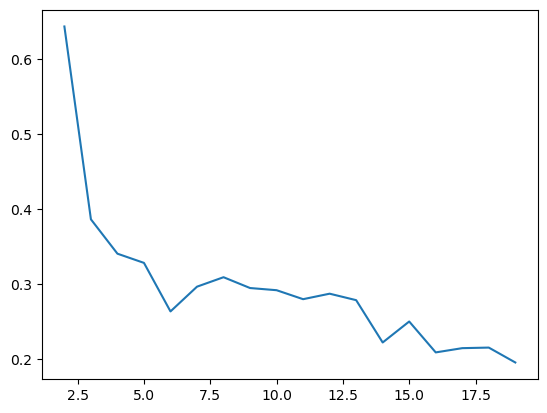

In [18]:
show_silhouette(x=red_c)

In [19]:
k_means = KMeans(n_clusters=3, max_iter=1000)
k_means.fit(red_c) # 訓練
y_red = k_means.predict(red_c) # 預測
adjusted_rand_score(y_true_c, y_red)

0.013504669020381449

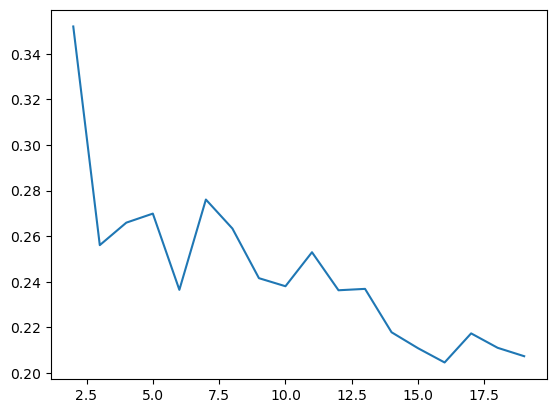

In [20]:
show_silhouette(x=green_c)

In [21]:
k_means = KMeans(n_clusters=4, max_iter=1000)
k_means.fit(green_c) # 訓練
y_green = k_means.predict(green_c) # 預測
adjusted_rand_score(y_true_c, y_green)

-0.02322195530319575

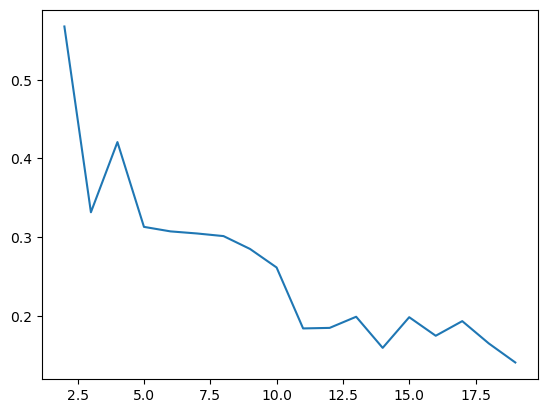

In [22]:
show_silhouette(x=brown_c)

In [23]:
k_means = KMeans(n_clusters=4, max_iter=1000)
k_means.fit(brown_c) # 訓練
y_brown = k_means.predict(brown_c) # 預測
adjusted_rand_score(y_true_c, y_brown)

-0.02413200412512891

### Step 4-3-2. ignored_index data & DBSCAN

In [24]:
db = DBSCAN(eps=100000, min_samples=5).fit(red_c)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 9


In [25]:
db = DBSCAN(eps=100000, min_samples=5).fit(green_c)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 1


In [26]:
db = DBSCAN(eps=100000, min_samples=5).fit(brown_c)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 8
